In [1]:
import numpy as np
import matplotlib.pyplot as plt
from network_analysis import network_tools as nt

# General parameters
We first set general parameters of our network.

Namely, we define the characteristic impedance $Z_0$ and the speed of light in the transmission lines $\nu_p$ (a.k.a. phase velocity).

In [2]:
# Parameters
c = 3e8                     # speed of light in vaccum
eps_r = 11.45               # relative permeability of our substrate
vp = c/np.sqrt((1+eps_r)/2) # speed of light in the transmission line
Z0 = 50                     # characteristic impedance

# Setup microwave network
We can setup a microwave network using the "Network" instance of the network_tools library.

Elements such can be added to the network using the network.add_* methods. These include:
- capacitors (series or parallel)
- inductors (series or parallel)
- resistors (series or parallel)
- transmission lines (series or parallel)
- attenuators
- amplifiers
- capacitively coupled resonators
- inductively coupled resonators

In the following, we setup an example network and used the "draw_network" method to visualize it.
The scattering parameters of the network can be obtained using the "get_S_parameters" method.

### High-pass filter (series capacitor)

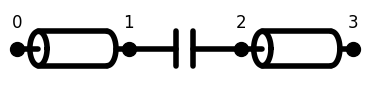

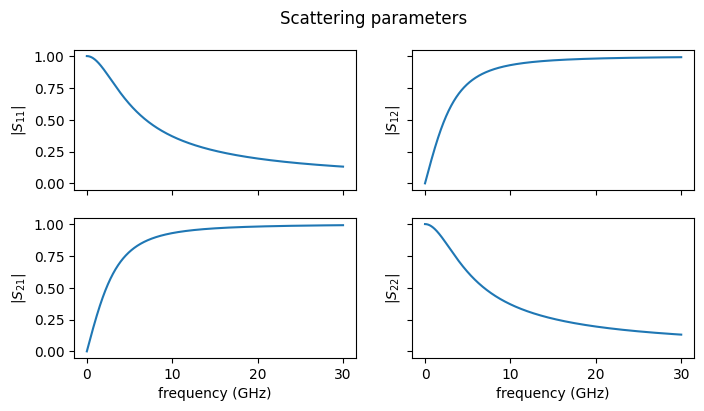

In [3]:
network = nt.Network(Zgen=Z0)
# 400 fF capacitor
network.add_transmission_line(length=1e-3, Z0=Z0, phase_velocity=vp)
network.add_capacitance(C=400e-15, element_type='series')
network.add_transmission_line(length=1e-3, Z0=Z0, phase_velocity=vp)
network.draw_network()
s11, s12, s21, s22 = network.get_S_parameters(frequency=np.linspace(1,30e9,1000), plot=True)

### RLC resonator

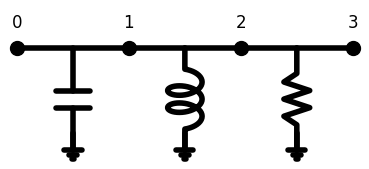

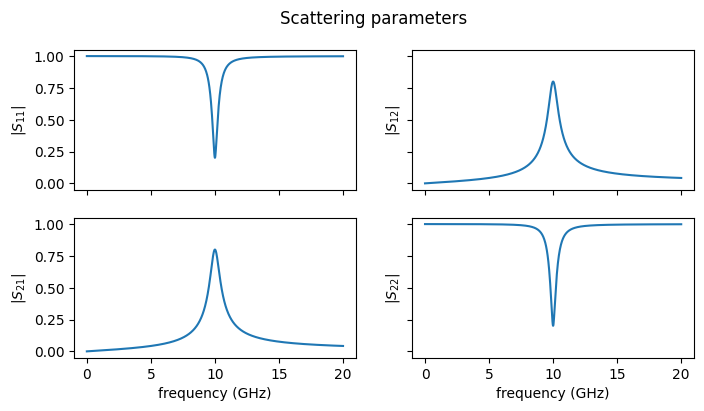

In [4]:
resonance_frequency = 10e9
C = 10e-12
L = 1/(C* (2*np.pi*resonance_frequency)**2 )

network = nt.Network(Zgen=Z0)
network.add_capacitance(C=C, element_type='parallel')
network.add_inductance(L=L, element_type='parallel')
network.add_resistor(R=1e2, element_type='parallel')
network.draw_network()
s11, s12, s21, s22 = network.get_S_parameters(frequency=np.linspace(1,20e9,1000), plot=True)

### Capacitively coupled resonator

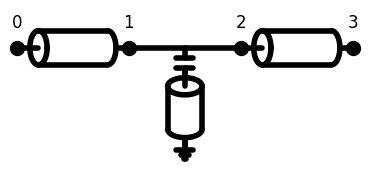

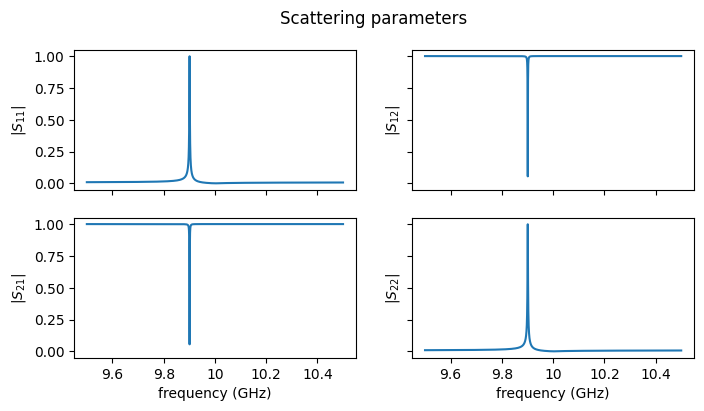

In [5]:
f0 = 10e9
resonator_length = vp/4/f0

network = nt.Network(Zgen=Z0)
network.add_transmission_line(length=1e-3, Z0=Z0, phase_velocity=vp)
network.add_capacitively_coupled_hanger(length=resonator_length, Z0=Z0, phase_velocity=vp, Z_termination=0, C_coupling=5e-15)
network.add_transmission_line(length=1e-3, Z0=Z0, phase_velocity=vp)
network.draw_network()
s11, s12, s21, s22 = network.get_S_parameters(frequency=np.linspace(-500e6, 500e6,10000)+f0 , plot=True)